In [1]:
import gdal
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.windows import Window
from PIL import Image

In [10]:
def Median_Filter(Image_Noisy, Factor):
    
    Mask = np.full((Factor, Factor),1)
    
    size = len(Mask)
    paddy = int((size-1)/2)
    height, width = Image_Noisy.shape[0], Image_Noisy.shape[1]
    
    Image_copy_array = np.asarray(Image_Noisy)

    #Converting image to array
    Pad_image = np.pad(np.array(Image_copy_array), ((paddy,paddy), (paddy, paddy)), 'constant')

    # Creating a matrix with zeros to store convolution and correlation results

    height_p = height + 2*paddy
    width_p = width + 2*paddy
    
    Corr_Image = np.full((height_p, width_p),0)

    # Correlation

    for i in range(paddy,height_p-paddy):
        for j in range(paddy,width_p- paddy):
            submatrix = Pad_image[i-paddy:i+paddy+1,j-paddy:j+paddy+1]            
            
            submatrix_mask_multipy_corr = np.multiply(submatrix , Mask)
            
            elements_list =[]
            for z in submatrix_mask_multipy_corr:
                elements_list.append(z)
                    
            #Finding the Median value of pixel values in current window
            
            Corr_Image[i,j] = np.median(elements_list)
            
    Corr_Image_cropped = Corr_Image[paddy:height_p -paddy,paddy:width_p-paddy]  
    Corr_Image_cropped = np.clip(Corr_Image_cropped, 0, 255)
    Corr_Image_cropped = Corr_Image_cropped.astype('uint8')

    Correlated_Image = Image.fromarray(Corr_Image_cropped)
    return Correlated_Image

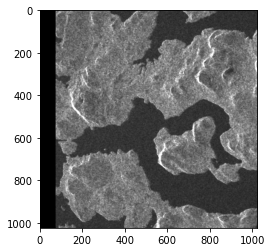

In [11]:
with rasterio.open('sar_vh_training00.tiff') as src:
    w = src.read(1, window=Window(0, 0, 1024, 1024))
    returned = Median_Filter(w,5)
    plt.imshow(returned, cmap='gray')
    plt.show()

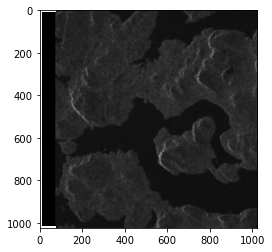

In [6]:
with rasterio.open('sar_vh_training00_Lee.tif') as src:
    w = src.read(1, window=Window(0, 0, 1024, 1024))    
    plt.imshow(w, cmap='gray')
    plt.show()

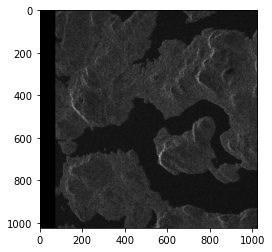

In [8]:
with rasterio.open('sar_vh_training00_Gamma.tif') as src:
    w = src.read(1, window=Window(0, 0, 1024, 1024))    
    plt.imshow(w, cmap='gray')
    plt.show()

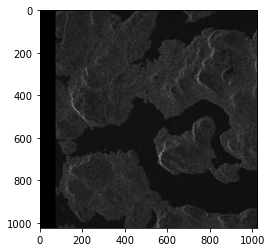

In [7]:
with rasterio.open('sar_vh_training00.tiff') as src:
    w = src.read(1, window=Window(0, 0, 1024, 1024))    
    plt.imshow(w, cmap='gray')
    plt.show()